# This is the title of the Project (H1)

In [18]:
# This is a code cell without any tag *before* the first task header.
# You can put convenience code here, but it won't be included in any
# way in the final project.
# For example, to be able to run tests locally in the notebook
# you need to install the following:
# pip install nose
# pip install git+https://github.com/akaihola/ipython_nose
# and then load in the ipython_nose extension like this:
%load_ext ipython_nose

The ipython_nose extension is already loaded. To reload it, use:
  %reload_ext ipython_nose


## 1. Title of first task (H2)

*Context/background/story/motivation/etc. of the first task.*

![](img/snakes.png)

Note: It's not required, but *nice* if the task titles are manually numbered as above.

This is the instructions for the first task, this is what the student will read in the sidebar. Here is where tagged cells go:

![](img/where_tags_go.gif)

(This does not include the `@tests` and the `@solution` which the student won't see). 

Here are all the tags that make up a *task* (the ordering is optional, but the following is a good order):

* `type:NotebookTask` : Markdown cell
* `@context` : Markdown cell
* `@instructions` : Markdown cell
* `@sample_code` : Code cell
* `@solution` : Code cell
* `@tests` : Code cell

This is a hint the student will get if they click the hint button at the bottom of the instructions.

In [19]:
# This is the code scaffold the student will get in their first task.
import pandas as pd
pd.read_csv("datasets/iris.csv")

In [1]:
# "Solution" code for the first task
import pandas as pd
pd.read_csv("datasets/iris.csv")


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [21]:
%%nose

def test_placeholder():
    assert True == True, \
        "The student will see this if the test fails"

1/1 tests passed


## 2. Title of second task (H2)

*Context/background/story/motivation/etc. of the second task.*

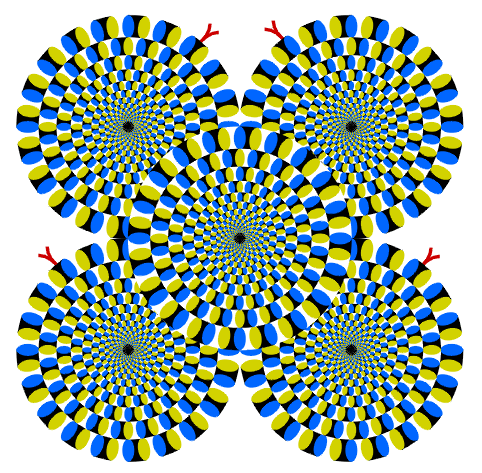

This is the instructions the student will see

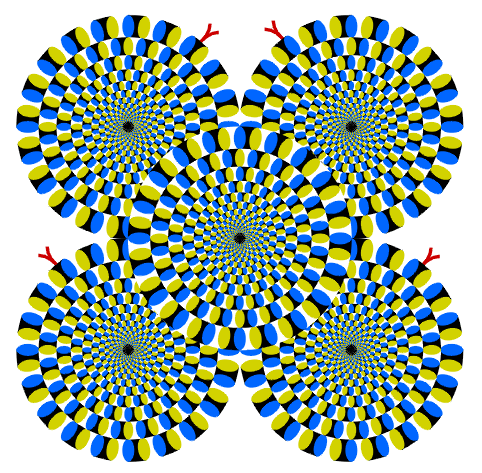

This is a hint the student will get if they click the hint button at the bottom of the instructions.

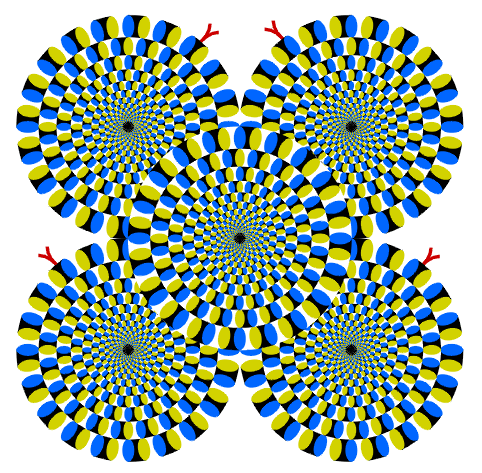

In [3]:
# This is the sample code the student will see
exec(open("datasets/foo.py").read())
foo()

Hello you foo!


In [23]:
# This is the sample code the student will see
exec(open("datasets/foo.py").read())
foo()

43

In [24]:
%%nose

def test_placeholder():
    assert True == True, \
        "The student will see this if the test fails"


1/1 tests passed


## 3. Title of third task (H3)

*Context/background/story/motivation/etc. of the third task.*

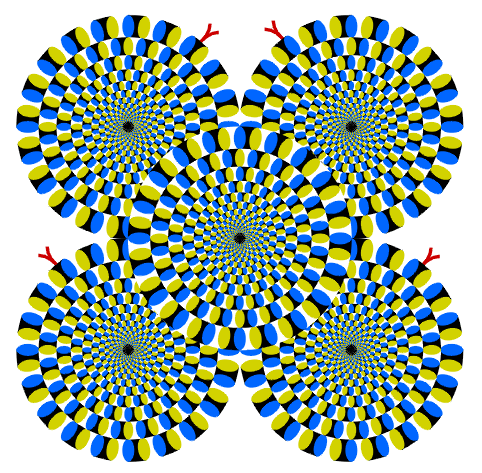

This is the instructions the student will see

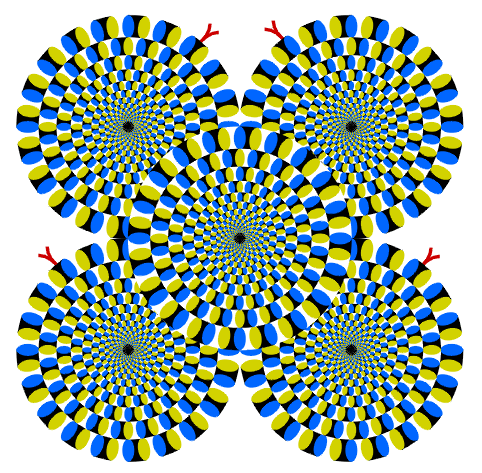

This is a hint the student will get if they click the hint button at the bottom of the instructions.

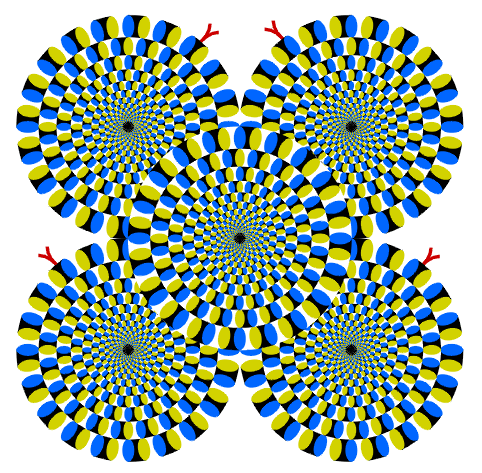

In [25]:
# This is the sample code the student will see
# ... YOUR CODE HERE ...

In [26]:
# Code for the third task
print("And another task...\n" * 3, "etc...")

And another task...
And another task...
And another task...
 etc...


In [27]:
%%nose

def test_placeholder():
    assert True == True, \
        "The student will see this if the test fails"


1/1 tests passed


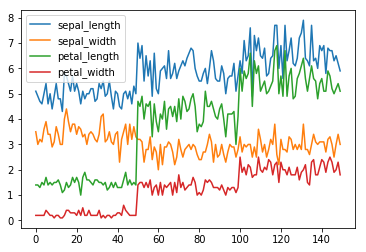

In [6]:
import pandas as pd
iris = pd.read_csv("datasets/iris.csv")
iris.plot()

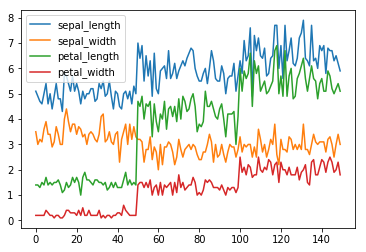

In [7]:
iris.plot()

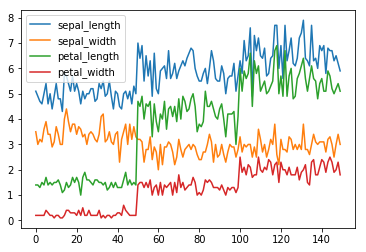

In [7]:
iris.plot()

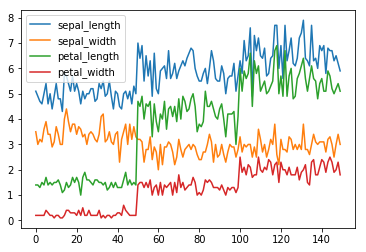

In [8]:
iris.plot()

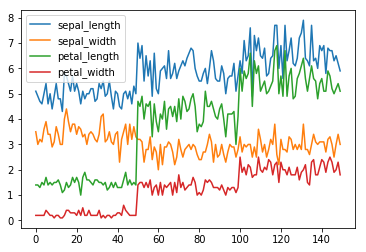

In [9]:
iris.plot()